In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split

In [3]:
data = pd.read_csv('downsampled_data.csv')

In [4]:
# Assuming your dataset is loaded into `data`
# Replace with actual column names and dataset
selected_features = [
     'SYNOPCode',
 'Visibility',
 'Temperature',
 'AbsoluteHumidityMin',
 'ParticulateMax',
 'RainIntensityMax',
 'Distance',
 'RainIntensity',
 'RainIntensityMin',
 'AbsoluteHumidity',
'FSO_Att',
'RFL_Att']

filtered_data = data[selected_features]

In [5]:
# Step 1: Predict RF_Att using the generic model
# Separate predictors and target for RF_Att
X_rf = filtered_data.drop(columns=['RFL_Att', 'FSO_Att'])  # Predictors for RF_Att
y_rf = filtered_data['RFL_Att']  # Target variable: RF_Att

# Train-test split for RF_Att
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

# Train the generic model for RF_Att
rf_model_rf = RandomForestRegressor(random_state=42)
rf_model_rf.fit(X_rf_train, y_rf_train)

# Predict RF_Att
predicted_rf_att = rf_model_rf.predict(X_rf_test)


In [6]:
# Evaluate the model for FSO_Att
rmse_rf = np.sqrt(mean_squared_error(y_rf_test, predicted_rf_att))
r2_rf = r2_score(y_rf_test, predicted_rf_att)

# Display the results for FSO_Att prediction
print("FSO_Att Model Performance Using Predicted FSO_Att:")
print(f"RMSE: {rmse_rf}")
print(f"R^2: {r2_rf}")

FSO_Att Model Performance Using Predicted FSO_Att:
RMSE: 1.1025096348658991
R^2: 0.914860087558419


In [7]:
X_FS = data.drop(columns=['RFL_Att', 'FSO_Att'])  # Predictors for RF_Att
y_FS = data['FSO_Att']  # Target variable: RF_Att

X_fs_train, X_fs_test, y_fs_train, y_fs_test = train_test_split(X_FS, y_FS, test_size=0.3, random_state=42)

X_fs_train = X_fs_train.copy()
X_fs_train['Predicted_RF_Att'] = rf_model_rf.predict(X_rf_train)  # Add predicted RF_Att to train data

X_fs_test = X_fs_test.copy()
X_fs_test['Predicted_RF_Att'] = predicted_rf_att  # Add predicted RF_Att to test data


In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def rank_predictor_importance(data, target_column):
    """
    Ranks the importance of predictor variables using the described algorithm.

    Parameters:
        data (pd.DataFrame): Input DataFrame containing predictors and the target column.
        target_column (str): Name of the target variable column.

    Returns:
        pd.DataFrame: A table with each predictor, RMSE, R^2, and rank based on importance.
    """
    # Step 1: Initialize S and R
    predictors = list(data.columns)
    #predictors.remove(target_column)
    S = predictors.copy()
    R = pd.DataFrame(columns=['Predictor', 'RMSE', 'R^2'])

    while S:
        # Step 3: Train Random Forest model on S
        X = data[S]
        y = target_column
        model = RandomForestRegressor(random_state=42, oob_score=True)
        model.fit(X, y)

        # Step 4: Calculate RMSE and R^2
        y_pred = model.oob_prediction_
        rmse = mean_squared_error(y, y_pred, squared=False)
        r2 = r2_score(y, y_pred)

        # Step 5: Rank predictor importance
        importances = model.feature_importances_
        importance_df = pd.DataFrame({'Predictor': S, 'Importance': importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=True)

        # Step 6: Remove least important predictor
        least_important = importance_df.iloc[0]
        S.remove(least_important['Predictor'])

        # Add new row to R
        R = pd.concat([R, pd.DataFrame([{
            'Predictor': least_important['Predictor'],
            'RMSE': rmse,
            'R^2': r2
        }])], ignore_index=True)

    # Step 8: Return the result
    return R

In [9]:
target_column = y_fs_train  # Replace with your target variable name

# Run the ranking algorithm
result = rank_predictor_importance(X_fs_train, target_column)

C:\Users\Jitendra Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Jitendra Sharma\AppData\Local\Temp\ipykernel_4988\4234211310.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  R = pd.concat([R, pd.DataFrame([{
C:\Users\Jitendra Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  wa

In [9]:
result

,Predictor,RMSE,R^2
0,Frequency,1.314453,0.913208
1,RainIntensityMax,1.314493,0.913202
2,RainIntensityMin,1.312360,0.913484
3,RainIntensity,1.309313,0.913885
4,WindDirection,1.308287,0.914020
5,SYNOPCode,1.298596,0.915289
6,WindSpeed,1.297651,0.915412
7,AbsoluteHumidityMax,1.299255,0.915203
8,WindSpeedMin,1.295750,0.915660
9,AbsoluteHumidityMin,1.289140,0.916518


In [25]:
import matplotlib.pyplot as plt

def plot_importance_ranking(results):
    """
    Plots a line graph for RMSE and R^2 values as predictors are removed.

    Parameters:
        results (pd.DataFrame): DataFrame output from `rank_predictor_importance` function.
    """
    # Ensure the results are sorted by the order of removal
    results = results.reset_index(drop=True)

    # Plot RMSE
    plt.figure(figsize=(10, 6))
    plt.plot(results['Predictor'], results['RMSE'], marker='o', label='RMSE', color='blue')

    # Plot R^2
    plt.plot(results['Predictor'], results['R^2'], marker='x', label='R^2', color='green')

    # Add labels and title
    plt.xlabel('Predictors Removed (in Order of Removal)')
    plt.ylabel('Metrics (RMSE / R^2)')
    plt.title('Change in RMSE and R^2 During Feature Elimination (FSO)')
    plt.xticks(rotation=45, ha='right')  # Rotate predictor names for readability
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example Usage
# Assuming `data` is your DataFrame and 'Target' is your target column
# results = rank_predictor_importance(data, 'Target')
# plot_importance_ranking(results)


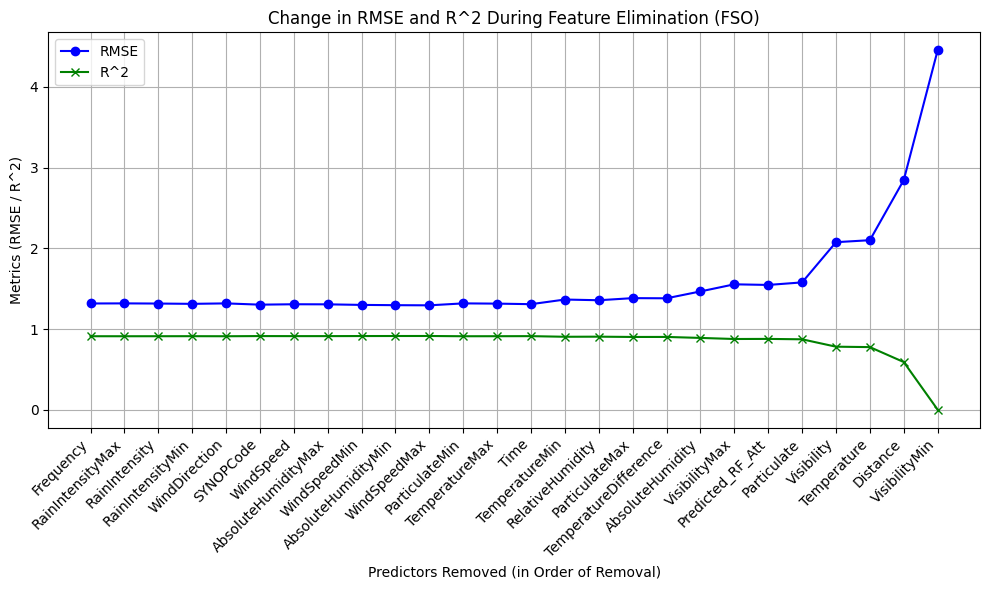

In [26]:
plot_123 = plot_importance_ranking(result)
plot_123

In [18]:
# Filter the dataset to include only the specified features
selected_features_1 = [
    "Particulate",
    "TemperatureDifference",
    "AbsoluteHumidity",
    "VisibilityMax",
    "Predicted_RF_Att",
    "ParticulateMax",
    "Visibility",
    "Temperature",
    "Distance",
    "VisibilityMin",
    'SYNOPCode'
]

filtered_data_1 = X_fs_train[selected_features_1]

In [19]:
# Step 2: Use predicted RF_Att to predict FSO_Att
# Add predicted RF_Att to test predictors
#X_fso_train = X_fs_train.loc[filtered_data_1.index].copy()
# Drop the 'SYNOPCode' column while maintaining the index-based subset
X_fso_train = X_fs_train.loc[filtered_data_1.index]#.drop(columns=['SYNOPCode'], errors='ignore').copy()

# This will handle cases where 'SYNOPCode' might not exist

#X_rf_train['Predicted_FSO_Att'] = fso_model_fso.predict(X_rf_train)  # Add predicted RF_Att to train data

X_fso_test = X_fs_test.copy()
#X_rf_test['Predicted_FSO_Att'] = predicted_fso_att  # Add predicted RF_Att to test data

# Target for FSO_Att
y_fso_train = y_fs_train.loc[filtered_data_1.index]#.drop(columns=['SYNOPCode'], errors='ignore').copy()
y_fso_test = y_fs_test #filtered_data_1.loc[X_rf_test.index, 'FSO_Att']

# Train the model for FSO_Att using predicted RF_Att
rf_model_fso = RandomForestRegressor(random_state=42)
rf_model_fso.fit(X_fso_train, y_fso_train)

# Predict FSO_Att
predicted_fso_att = rf_model_fso.predict(X_fso_test)

# Evaluate the model for FSO_Att
rmse_fso = np.sqrt(mean_squared_error(y_fso_test, predicted_fso_att))
r2_fso = r2_score(y_fso_test, predicted_fso_att)

In [24]:
y_fso_test.to_csv('Results/Mtd3_pred_FSO.csv', index=False)

In [20]:
# Display the results for FSO_Att prediction
print("FSO_Att Model Performance Using Predicted RF_Att:")
print(f"RMSE: {rmse_fso}")
print(f"R^2: {r2_fso}")

FSO_Att Model Performance Using Predicted RF_Att:
RMSE: 1.2839133892152808
R^2: 0.9207603785975529


In [22]:

# Initialize a dictionary to store results for each weather condition 
results = {} 
# Loop through unique SYNOP codes (weather conditions)
for synop in X_fso_test['SYNOPCode'].unique(): 
    # Filter test data for the current SYNOP code 
    X_test_synop = X_fso_test[X_fso_test['SYNOPCode'] == synop]
    y_test_synop = y_fso_test[X_fso_test.index.isin(X_test_synop.index)] 
    
    # Make predictions for this subset 
    predictions = rf_model_fso.predict(X_test_synop) 
    
    # Calculate RMSE and R² for this subset 
    rmse = np.sqrt(mean_squared_error(y_test_synop, predictions)) 
    r2 = r2_score(y_test_synop, predictions) 
    
    # Store results 
    results[synop] = {'RMSE': rmse, 'R²': r2}
    
# Convert results to a DataFrame for easier visualization
results_df = pd.DataFrame.from_dict(results, orient='index').reset_index() 
results_df.columns = ['SYNOP', 'RMSE', 'R²']

print("Weather Condition Evaluation Results:")
print(results_df)

Weather Condition Evaluation Results:
   SYNOP      RMSE        R²
0      6  1.575095  0.897032
1      0  1.344319  0.900898
2      5  1.108780  0.898960
3      8  1.066703  0.928011
4      4  0.674441  0.977284
5      7  0.892999  0.967400
6      3  0.999601  0.984440
